# Introduction to Logistic Regression

In this notebook, we will
- solve a classification problem using Logistic Regression.

The dataset contains the information of width ($x_1$) and length ($x_2$) of leaves. From this data, we try to classify leaf types ($y$).

Logistic Regression

## Example

In [1]:
import os
module_path = os.path.abspath(os.path.join('..'))
print(module_path)

d:\Job\VinUni\Research Assistant\Teaching Assistant\2024 April\Machine learning\Code


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train = pd.read_csv(os.path.join(module_path, "dataset", "train.csv"))
train.head()

,x1,x2,label
0,56.130749,61.006677,0
1,49.871157,43.687531,0
2,53.868769,62.477624,0
3,53.558846,52.686585,0
4,55.382830,52.925488,0


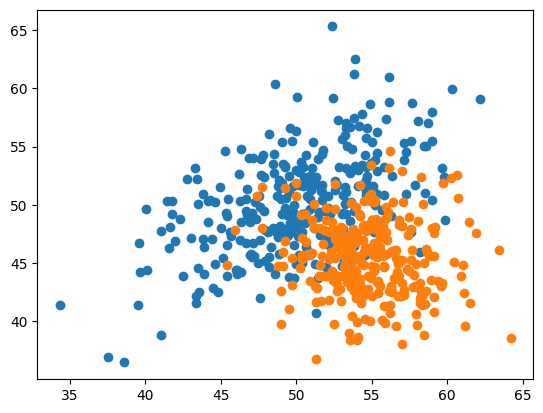

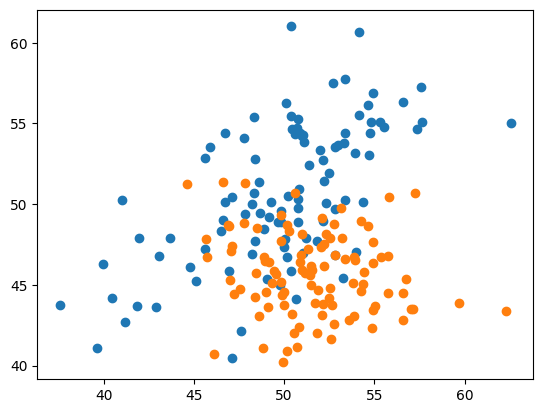

In [3]:
x1_train = train['x1'].values
x2_train = train['x2'].values
y_train = train['label'].values

plt.scatter(x1_train[y_train == 0], x2_train[y_train==0])
plt.scatter(x1_train[y_train == 1], x2_train[y_train==1])


plt.figure()
valid = pd.read_csv(os.path.join(module_path, "dataset", "valid.csv"))
x1_valid = valid['x1'].values
x2_valid = valid['x2'].values
y_valid = valid['label'].values
plt.scatter(x1_valid[y_valid == 0], x2_valid[y_valid==0])
plt.scatter(x1_valid[y_valid == 1], x2_valid[y_valid==1])


In [4]:
## normalization
x1_mean = np.mean(x1_train)
x1_std = np.std(x1_train)
x2_mean = np.mean(x2_train)
x2_std = np.std(x2_train)

x1_train = (x1_train - x1_mean)/ x1_std
x2_train = (x2_train - x2_mean)/ x2_std

x1_valid = (x1_valid - x1_mean)/ x1_std
x2_valid = (x2_valid - x2_mean)/ x2_std

In [5]:
import numpy as np

x1_train = x1_train.reshape(-1, 1)
x2_train = x2_train.reshape(-1, 1)

x1_valid = x1_valid.reshape(-1, 1)
x2_valid = x2_valid.reshape(-1, 1)

X_train = np.concatenate([x1_train, x2_train, np.ones((len(x1_train), 1))], axis=-1)
X_train = X_train.astype(np.float64)

X_valid = np.concatenate([x1_valid, x2_valid, np.ones((len(x1_valid),1))], axis=-1)
X_valid = X_valid.astype(np.float64)

Let $\mathbf{x}_i=\left(x^1_i, x^2_i, 1\right)$ be the extended vector and $y_i$ is its label. We assume the data is i.i.d.

Let $f$ be the activation function. We try to find $\mathbf{w}$ such that $f\left(\mathbf{w}^\top \mathbf{x}_i\right)$ closes to $1$ whenever this sample has label $1$, otherwise it closes to $0$.
Let
$$\mathbb{P}\left(y_i=1\mid \mathbf{x}_i\right)=f\left(\mathbf{w}^\top x_i\right),$$
$$\mathbb{P}\left(y_i=0\mid \mathbf{x}_i\right)=1-f\left(\mathbf{w}^\top x_i\right).$$
Let $z_i=f\left(\mathbf{w}^\top \mathbf{x}_i\right)$, we can re-written the above two equations as
$$\mathbb{P}\left(y_i\mid \mathbf{x}_i, \mathbf{w}\right)=z_i^{y_i}\left(1-z_i\right)^{1-y_i}.$$

The likelihood function can be written as

$$L\left(\mathbf{w}\mid \mathbf{x}, \mathbf{y}\right)=\mathbb{P}\left(\mathbf{y}\mid\mathbf{x}, \mathbf{w}\right)=\prod \mathbb{P}\left(y_i\mid \mathbf{x}_i, \mathbf{w}\right)=\prod z_i^{y_i}\left(1-z_i\right)^{1-y_i}.$$

The objective function, which is the negative log-likelihood function, can be written as

$$\mathcal{L}\left(\mathbf{w}\right)= -\log L\left(\mathbf{w}\mid \mathbf{x}, \mathbf{y}\right)=-\sum \left(y_i\log z_i+\left(1-y_i\right)\log\left(1-z_i\right)\right).$$
The gradient update of $\mathbf{w}$ is
$$\frac{\partial\mathcal{L}}{\partial\mathbf{w}}\left(\mathbf{w}\right)=\sum\left(z_i-y_i\right)\mathbf{x}_i,$$
$$\mathbf{w}=\mathbf{w}-\lambda \frac{\partial\mathcal{L}}{\partial\mathbf{w}}\left(\mathbf{w}\right).$$

In [6]:
def sigmoid(k):
  return 1/(1+np.exp(-k))

### Gradient Descent

In [7]:
theta1, theta2, theta3 = 0.0, 0.0, 0.0

w = np.array([-5, 1, 3], dtype=np.float64)
w = w.reshape(-1, 1)

lrn_rate = 0.001
n_iters = 100000

best_theta = None      #saving parameters having best accuracy on validation set
best_val_acc = -1.0


for ii in range(n_iters):
    error = sigmoid(np.matmul(X_train, w))-y_train.reshape(-1, 1)

    gradient = np.mean(error*X_train, axis = 0)
    # print(gradient)
    gradient = gradient.reshape(-1, 1)

    w = w - lrn_rate * gradient


    if ii % 10000 == 0:

        pred_proba_train = sigmoid(np.matmul(X_train, w)) ## label 1 probability
        train_loss = np.mean(-(1-y_train.reshape(-1, 1))*np.log(pred_proba_train) - y_train.reshape(-1, 1)*np.log(1-pred_proba_train))
        train_acc = np.mean(y_train.reshape(-1, 1) == (pred_proba_train > 0.5).astype(int))                ## convert the probability into label and calculate accuracy


        pred_proba_valid = sigmoid(np.matmul(X_valid, w))
        valid_loss = np.mean(-(1-y_valid.reshape(-1, 1))*np.log(pred_proba_valid) - y_valid.reshape(-1, 1)*np.log(1-pred_proba_valid))
        valid_acc = np.mean(y_valid.reshape(-1, 1) == (pred_proba_valid > 0.5).astype(int))

        if valid_acc > best_val_acc:
            ## save best params
            best_val_acc = valid_acc
            best_theta = w

        print("Iter {} - loss {:.4f} - acc {:.4f} - val_loss {:.4f} - val_acc {:.4f}".format(ii, train_loss, train_acc, valid_loss, valid_acc))

w = best_theta
train_acc = np.mean(y_train.reshape(-1, 1) == (sigmoid(np.matmul(X_train, w)) > 0.5).astype(int))
valid_acc = np.mean(y_valid.reshape(-1, 1) == (sigmoid(np.matmul(X_valid, w)) > 0.5).astype(int))
print("Accuracy on train: ", train_acc)
print("Accuracy on valid: ", valid_acc)

Iter 0 - loss 0.8637 - acc 0.3067 - val_loss 2.0705 - val_acc 0.4400
Iter 10000 - loss 1.1324 - acc 0.6517 - val_loss 1.2222 - val_acc 0.7000
Iter 20000 - loss 1.6924 - acc 0.8583 - val_loss 1.4515 - val_acc 0.8050
Iter 30000 - loss 1.9989 - acc 0.8583 - val_loss 1.6758 - val_acc 0.7850
Iter 40000 - loss 2.1846 - acc 0.8550 - val_loss 1.8176 - val_acc 0.7800
Iter 50000 - loss 2.3085 - acc 0.8567 - val_loss 1.9134 - val_acc 0.7750
Iter 60000 - loss 2.3953 - acc 0.8567 - val_loss 1.9810 - val_acc 0.7800
Iter 70000 - loss 2.4582 - acc 0.8567 - val_loss 2.0301 - val_acc 0.7800
Iter 80000 - loss 2.5045 - acc 0.8567 - val_loss 2.0663 - val_acc 0.7800
Iter 90000 - loss 2.5391 - acc 0.8567 - val_loss 2.0935 - val_acc 0.7800
Accuracy on train:  0.8583333333333333
Accuracy on valid:  0.805


### Stochastic Gradient Descent

In [8]:
theta1, theta2, theta3 = 0.0, 0.0, 0.0

w = np.array([-5, 1, 3], dtype=np.float64)
w = w.reshape(-1, 1)

lrn_rate = 0.001
n_iters = 100000

best_theta = None      #saving parameters having best accuracy on validation set
best_val_acc = -1.0


for ii in range(n_iters):

    idx = np.random.randint(len(y_train))

    X_sample = X_train[idx:idx+1]
    y_sample = y_train[idx:idx+1]

    error = sigmoid(np.matmul(X_sample, w))-y_sample.reshape(-1, 1)

    gradient = np.mean(error*X_sample, axis = 0)
    # print(gradient)
    gradient = gradient.reshape(-1, 1)

    w = w - lrn_rate * gradient


    if ii % 10000 == 0:

        pred_proba_train = sigmoid(np.matmul(X_train, w)) ## label 1 probability
        train_loss = np.mean(-(1-y_train.reshape(-1, 1))*np.log(pred_proba_train) - y_train.reshape(-1, 1)*np.log(1-pred_proba_train))
        train_acc = np.mean(y_train.reshape(-1, 1) == (pred_proba_train > 0.5).astype(int))                ## convert the probability into label and calculate accuracy


        pred_proba_valid = sigmoid(np.matmul(X_valid, w))
        valid_loss = np.mean(-(1-y_valid.reshape(-1, 1))*np.log(pred_proba_valid) - y_valid.reshape(-1, 1)*np.log(1-pred_proba_valid))
        valid_acc = np.mean(y_valid.reshape(-1, 1) == (pred_proba_valid > 0.5).astype(int))

        if valid_acc > best_val_acc:
            ## save best params
            best_val_acc = valid_acc
            best_theta = w

        print("Iter {} - loss {:.4f} - acc {:.4f} - val_loss {:.4f} - val_acc {:.4f}".format(ii, train_loss, train_acc, valid_loss, valid_acc))

w = best_theta
train_acc = np.mean(y_train.reshape(-1, 1) == (sigmoid(np.matmul(X_train, w)) > 0.5).astype(int))
valid_acc = np.mean(y_valid.reshape(-1, 1) == (sigmoid(np.matmul(X_valid, w)) > 0.5).astype(int))
print("Accuracy on train: ", train_acc)
print("Accuracy on valid: ", valid_acc)

Iter 0 - loss 0.8638 - acc 0.3067 - val_loss 2.0708 - val_acc 0.4400
Iter 10000 - loss 1.1295 - acc 0.6417 - val_loss 1.2359 - val_acc 0.6900
Iter 20000 - loss 1.6856 - acc 0.8567 - val_loss 1.4451 - val_acc 0.8000
Iter 30000 - loss 1.9911 - acc 0.8567 - val_loss 1.6643 - val_acc 0.7850
Iter 40000 - loss 2.1678 - acc 0.8600 - val_loss 1.7951 - val_acc 0.7850
Iter 50000 - loss 2.2835 - acc 0.8567 - val_loss 1.8929 - val_acc 0.7750
Iter 60000 - loss 2.3784 - acc 0.8583 - val_loss 1.9663 - val_acc 0.7750
Iter 70000 - loss 2.4225 - acc 0.8567 - val_loss 2.0065 - val_acc 0.7750
Iter 80000 - loss 2.4943 - acc 0.8567 - val_loss 2.0633 - val_acc 0.7750
Iter 90000 - loss 2.5279 - acc 0.8567 - val_loss 2.0839 - val_acc 0.7750
Accuracy on train:  0.8566666666666667
Accuracy on valid:  0.8


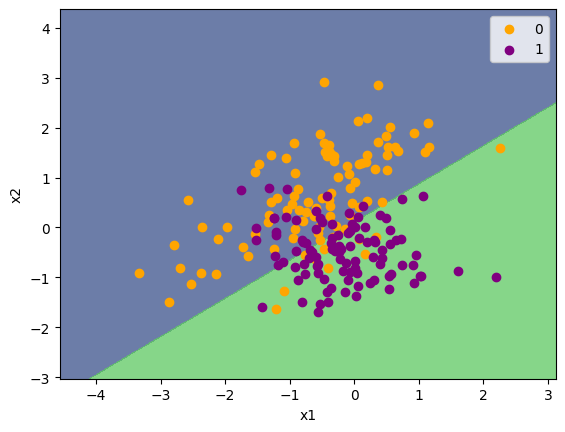

In [ ]:
# decision boundary visualization

import numpy as np
import matplotlib.pyplot as plt

# Create a meshgrid of x1 and x2 values
x1_min, x1_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
x2_min, x2_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))

# Predict the class labels for all points in the meshgrid
Z = sigmoid(np.matmul(np.c_[xx1.ravel(), xx2.ravel(), np.ones(len(xx1.ravel()))], w)) > 0.5

# Plot the decision boundary and data points
plt.contourf(xx1, xx2, Z.reshape(xx1.shape), alpha=0.75)
# plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='blue', label='0')
# plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='red', label='1')

plt.scatter(X_valid[y_valid == 0, 0], X_valid[y_valid == 0, 1], c='orange', label='0')
plt.scatter(X_valid[y_valid == 1, 0], X_valid[y_valid == 1, 1], c='purple', label='1')

# plt.plot(x1_train, (-w[2]-w[0]*x1_train)/w[1], color = "red") # decision boundary

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

The Decision boundary of the Logistic Regression problem has the liear form. Because,
$$\mathbb{P}\left(y_i=1\mid \mathbf{x}_i, \mathbf{w}\right)>\frac{1}{2} \Leftrightarrow \frac{1}{1+e^{-\mathbf{w}^\top \mathbf{x}_i}}>\frac{1}{2} \Leftrightarrow e^{-\mathbf{w}^\top \mathbf{x}_i}<1 \Leftrightarrow \mathbf{w}^\top \mathbf{x}_i>0.$$

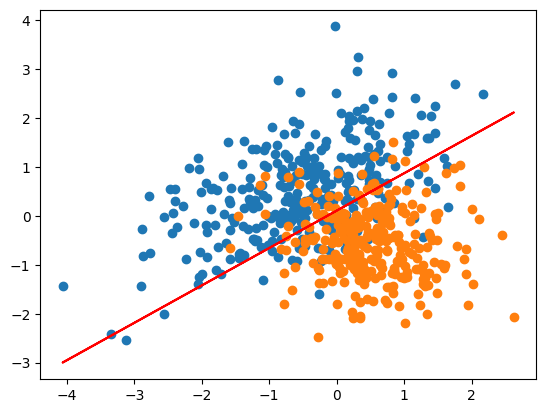

In [ ]:
#plot manually

plt.figure()
plt.scatter(x1_train[y_train == 0], x2_train[y_train==0])
plt.scatter(x1_train[y_train == 1], x2_train[y_train==1])
plt.plot(x1_train, (-w[2]-w[0]*x1_train)/w[1], color = "red") # decision boundary

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train = np.concatenate([x1_train.reshape(-1,1), x2_train.reshape(-1,1)], axis=-1)
X_valid = np.concatenate([x1_valid.reshape(-1,1), x2_valid.reshape(-1,1)], axis=-1)

lr = LogisticRegression().fit(X_train, y_train)
print("Sklearn accuracy on train: ", np.mean(y_train == lr.predict(X_train)))
print("Sklearn accuracy on valid: ", np.mean(y_valid == lr.predict(X_valid)))

Sklearn accuracy on train:  0.8566666666666667
Sklearn accuracy on valid:  0.78


## Exercise 01

Use $\texttt{tanh}$ activation function to solve the above Logistic Regression problem.

## Exercise 02

Solve the below Multi-class Classification problem using Softmax Regression.

We want to use width and length of a leaf to classify it into 3 classes. Specifically, let $\mathbf{x}_i=\left(x_{i1}, x_{i2}, 1\right)$ be input, we try to predict the probability $$\mathbb{P}_{\mathbf{W}}\left(c\mid \mathbf{x}_i\right), \quad c=0, 1, 2.$$

Let $\mathbf{W}=\left(\mathbf{w}_0, \mathbf{w}_1, \mathbf{w}_2\right)$. We use the softmax function to formalize the model, i.e.,
$$ \mathbf{a}_i := \mathbb{P}_{\mathbf{W}}\left(c\mid \mathbf{x}_i\right) = \frac{e^{\mathbf{w}_c^\top \mathbf{x}_i}}{\sum_{j=0}^{\left|\left\{0, 1, 2\right\}\right|} e^{\mathbf{w}_j^\top \mathbf{x}_i}}, \quad c=0, 1, 2.$$

Let $\mathbf{y}_i = \left(y_{i0}, y_{i1}, y_{i2}\right)$ be the one-hot vector demonstrating the corresponding leaf wrt $x$. We find $\mathbf{W}$ minimizing the following objective:
$$ \mathcal{L}\left(\mathbf{W}\right) = -\sum_{i = 1}^N \sum_{j = 1}^{\left|\left\{0, 1, 2\right\}\right|} y_{ji}\log(a_{ji}).$$

Solve this problem using Gradient Descent.

Make comparison with Sklearn library.